In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
nhl_data=pd.read_csv("nhl.csv")
nhl_data["season"].unique()
nhl_data

,season,date,playoff,neutral,status,ot,home_team,away_team,home_team_abbr,away_team_abbr,...,overtime_prob,home_team_expected_points,away_team_expected_points,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,game_quality_rating,game_importance_rating,game_overall_rating
0,1918,1917-12-18,0,0,post,NaN,Montreal Wanderers,Toronto Maple Leafs,MTW,TOR,...,0.234852,1.243569,0.991283,10.0,9.0,1382.020049,1377.979951,0,NaN,NaN
1,1918,1917-12-18,0,0,post,NaN,Ottawa Senators,Montreal Canadiens,OTS,MTL,...,0.234852,1.243569,0.991283,4.0,7.0,1374.590020,1385.409980,0,NaN,NaN
2,1918,1917-12-20,0,0,post,NaN,Montreal Wanderers,Montreal Canadiens,MTW,MTL,...,0.235451,1.235382,1.000069,2.0,11.0,1374.108886,1393.321143,0,NaN,NaN
3,1918,1917-12-20,0,0,post,NaN,Toronto Maple Leafs,Ottawa Senators,TOR,OTS,...,0.234254,1.251739,0.982515,11.0,4.0,1383.198318,1369.371652,0,NaN,NaN
4,1918,1917-12-25,0,0,post,NaN,Toronto Maple Leafs,Montreal Canadiens,TOR,MTL,...,0.236643,1.219075,1.017568,7.0,5.0,1386.503950,1390.015512,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64623,2022,2022-04-29,0,0,pre,NaN,St. Louis Blues,Vegas Golden Knights,STL,VEG,...,0.233013,1.276983,0.956031,NaN,NaN,NaN,NaN,92,91.0,91.0
64624,2022,2022-04-29,0,0,pre,NaN,Dallas Stars,Anaheim Ducks,DAL,ANA,...,0.220656,1.445395,0.775261,NaN,NaN,NaN,NaN,12,12.0,12.0
64625,2022,2022-04-29,0,0,pre,NaN,Edmonton Oilers,Vancouver Canucks,EDM,VAN,...,0.231830,1.293524,0.938306,NaN,NaN,NaN,NaN,66,55.0,60.0
64626,2022,2022-04-29,0,0,pre,NaN,Seattle Kraken,San Jose Sharks,SEA,SJS,...,0.236408,1.229334,1.007074,NaN,NaN,NaN,NaN,0,0.0,0.0


<AxesSubplot:xlabel='season'>

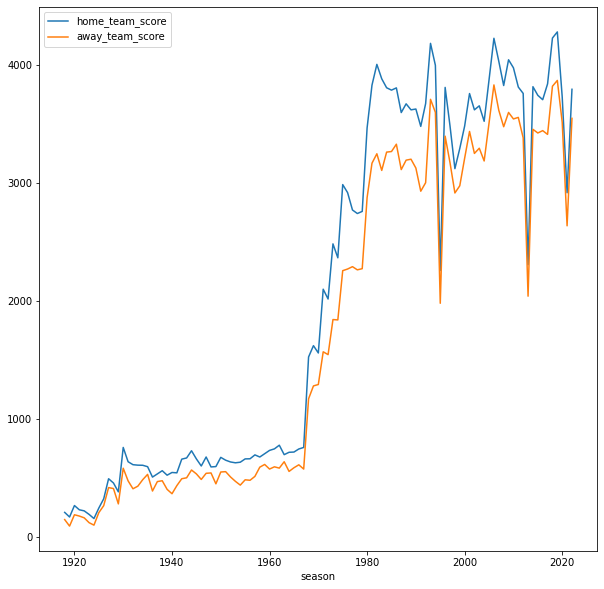

In [107]:
#Group the Data on the basis of season
group_by_year=nhl_data.groupby("season")
group_by_year[["home_team_score","away_team_score"]].sum().plot(figsize=(10,10))
#Home team score and away team team score from 1920-2020

/tmp/ipykernel_34664/2950725637.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  again_group["home_team_score","away_team_score","home_team_expected_points","away_team_expected_points"].sum().plot.bar(figsize=(20,15),title="year base bar char")


<AxesSubplot:title={'center':'year base bar char'}, xlabel='season'>

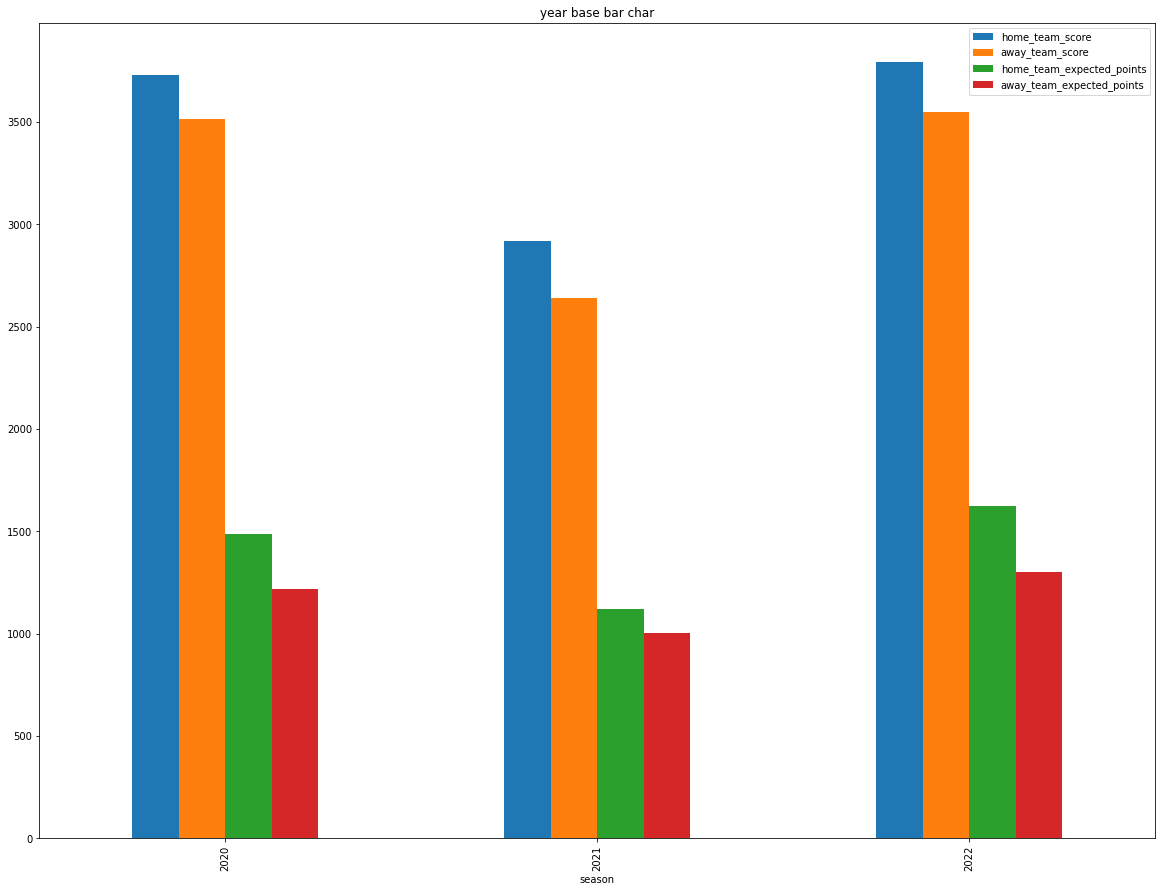

In [108]:
#get the data of 2020,2021,2022 from grouped data
data_2020=group_by_year.get_group(2020)
data_2021=group_by_year.get_group(2021)
data_2022=group_by_year.get_group(2022)
final_data=pd.concat([data_2020,data_2021,data_2022])
again_group=final_data.groupby("season")
again_group["home_team_score","away_team_score","home_team_expected_points","away_team_expected_points"].sum().plot.bar(figsize=(20,15),title="year base bar char")

In [109]:
data_2020["date"]=pd.to_datetime(data_2020["date"])

/tmp/ipykernel_34664/1480828290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020["date"]=pd.to_datetime(data_2020["date"])


In [110]:
data_2020['month']=data_2020["date"].dt.month

/tmp/ipykernel_34664/3905672090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['month']=data_2020["date"].dt.month


In [111]:
# data_2020[data_2020["month"]==10].plot.bar(figsize=(20,15))
# data_2020[["home_team_score","away_team_score"]].plot()
# data_2020[["month"==10,"home_team_score","away_team_score"]].plot()

In [112]:
len(group_by_year)

104

In [113]:
#extract only month 10 data
te=data_2020[data_2020["month"]==10]
len(te)
te["date"]=pd.to_datetime(te["date"])
#Type cast the Datatime data
te.set_index("date")
te["date"].dt.weekday
# te[["home_team_score","away_team_score"]].plot.bar(figsize=(20,15))

/tmp/ipykernel_34664/119401240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te["date"]=pd.to_datetime(te["date"])


61153    1
61154    1
61155    1
61156    1
61157    2
        ..
61351    3
61352    3
61353    3
61354    3
61355    3
Name: date, Length: 203, dtype: int64

In [114]:
test=te[te["date"].dt.weekday>3]
# test[["home_team_score","away_team_score"]].plot.bar(figsize=(20,15))

#Again group the data on the basis of away_tea_abbr
group_data_abbr=test.groupby("away_team_abbr")

sum_by_abbr=group_data_abbr.sum()

/tmp/ipykernel_34664/2229919430.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_data_abbr["home_team_score","away_team_score"].sum().plot.bar(figsize=(20,15))


<AxesSubplot:xlabel='away_team_abbr'>

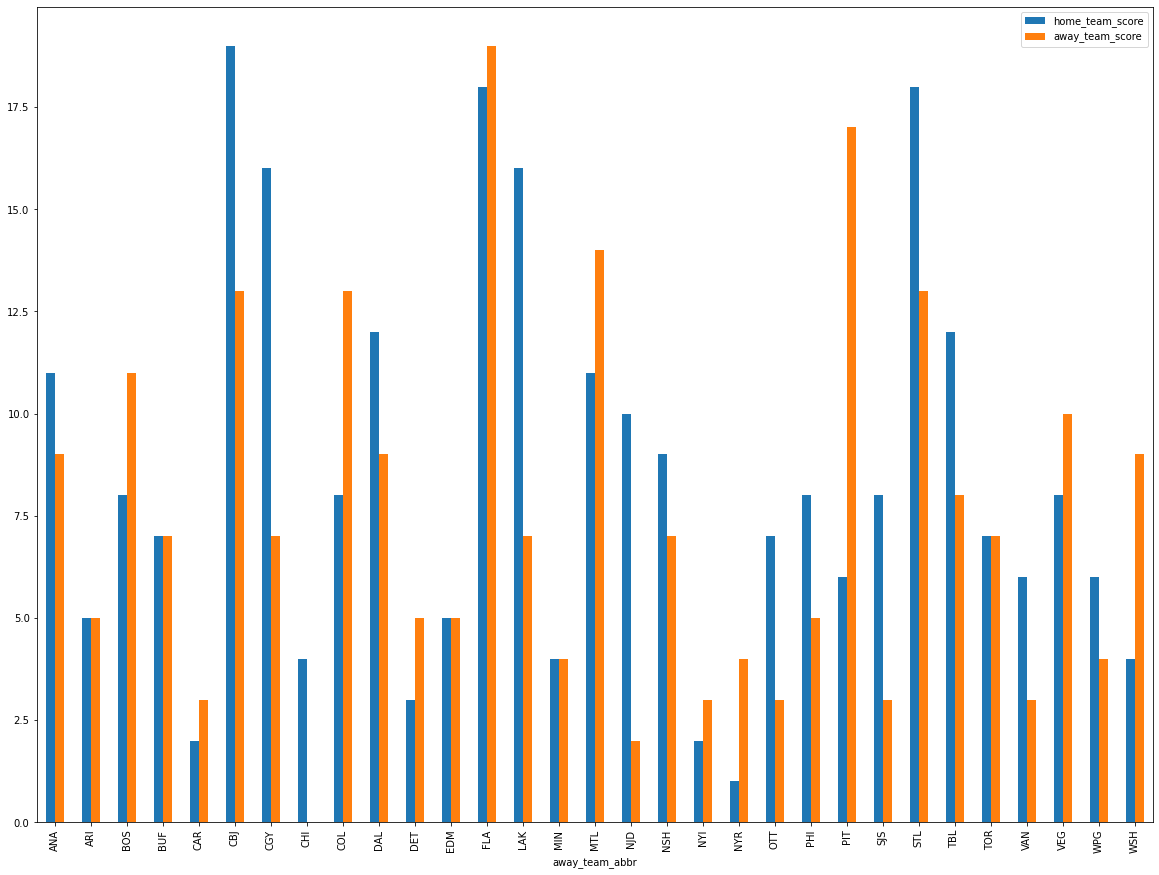

In [115]:
group_data_abbr["home_team_score","away_team_score"].sum().plot.bar(figsize=(20,15))

In [116]:
#Save the data to excel file

with pd.ExcelWriter("nhl.xlsx") as f:
    test.to_excel(f,sheet_name="abbr data")
    sum_by_abbr.to_excel(f,sheet_name="sum data")
    

In [117]:
# for name,group in group_by_year:
#     print(name)
#     print(group)

In [118]:
# sum_by_abbr=sum_by_abbr.cumsum()
# plt.figure()

# sum_by_abbr.plot(figsize=(20,15))
# plt.legend(loc="best")

<AxesSubplot:title={'center':'sum of home team rating'}>

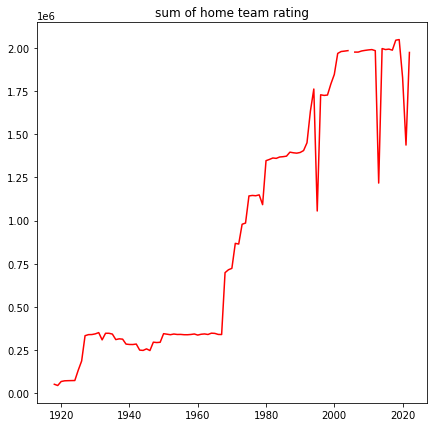

In [119]:
#sum the data by each colums on basis of year and make a new columns called sum_home_team
nhl_data["sum_home_team_pregame_rating"]=group_by_year.agg(np.sum)["home_team_pregame_rating"]
nhl_data["sum_home_team_pregame_rating"].plot(figsize=(7,7
                                                      ),style=["r","z"],
                                             title="sum of home team rating")

In [120]:
group_by_year.size().unique()
# group_by_year.describe()
# group_by_year.std()

array([  38,   32,   48,   50,   92,  130,  232,  233,  231,  236,  205,
        229,  206,  209,  208,  188,  187,  189,  165,  164,  170,  196,
        195,  227,  225,  228,  226,  224,  230,  484,  489,  490,  589,
        582,  662,  771,  768,  764,  765,  725,  907,  908,  911,  906,
        910,  912,  927,  924,  922,  925,  932,  966, 1093, 1182,  705,
       1152, 1148, 1193, 1231, 1316, 1320, 1319, 1313, 1311, 1315, 1317,
        806, 1323, 1321, 1355, 1358, 1212,  952])

In [121]:
#applying all function to column name overtime_prob
group_by_year["overtime_prob"].agg([np.sum,np.std,np.mean,np.max])

,sum,std,mean,amax
season,,,,
1918,8.915782,0.003754,0.234626,0.242724
1919,7.509617,0.003356,0.234676,0.240742
1920,11.071079,0.009446,0.230647,0.243576
1921,11.536757,0.009205,0.230735,0.243590
1922,11.581412,0.008805,0.231628,0.243256
...,...,...,...,...
2018,315.289365,0.007405,0.232686,0.243789
2019,316.002080,0.007368,0.232697,0.243788
2020,282.782795,0.007379,0.233319,0.243789


<AxesSubplot:title={'center':'Max minus Min'}, xlabel='season'>

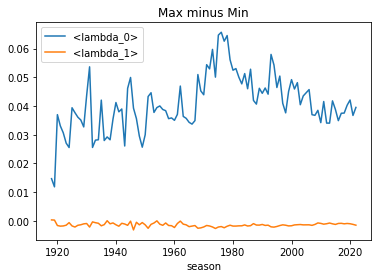

In [122]:
#Lamda
group_by_year["overtime_prob"].agg([lambda x:x.max()-x.min(),lambda x:x.mean()-x.median()]).plot(xlabel="season",title="Max minus Min")

In [124]:
group_by_year.agg(
                            minimum=pd.NamedAgg(column="overtime_prob",aggfunc="min"),
                            maximum=pd.NamedAgg(column="overtime_prob",aggfunc="max"),
                            average=pd.NamedAgg(column="overtime_prob",aggfunc=np.mean),
                            
                )

,minimum,maximum,average
season,,,
1918,0.228038,0.242724,0.234626
1919,0.228903,0.240742,0.234676
1920,0.206602,0.243576,0.230647
1921,0.210531,0.243590,0.230735
1922,0.212598,0.243256,0.231628
...,...,...,...
2018,0.206264,0.243789,0.232686
2019,0.203552,0.243788,0.232697
2020,0.201716,0.243789,0.233319
